In [ ]:
import subprocess
import sys

# List of required packages
required_packages = ['pandas', 'matplotlib', 'seaborn', 'numpy', 'plotly', 'pycountry']

for package in required_packages:
    try:
        __import__(package) # this will check if the package is already installed
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package]) # this line installs the package if it's not already installed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pycountry

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [4]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape

(133349, 11)

In [8]:
linhas, colunas = df.shape
print(f'linhas: {linhas}')
print(f'colunas: {colunas}')

linhas: 133349
colunas: 11


In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
rename_columns={
    'work_year': 'Arbeitsjahr',
    'experience_level': 'Erfahrungsstufe',
    'employment_type': 'Anstellungsart',
    'job_title': 'Berufsbezeichnung',
    'salary': 'Gehalt',
    'salary_currency': 'Gehaltswährung',
    'salary_in_usd': 'Gehalt_in_USD',
    'employee_residence': 'Wohnsitz_des_Mitarbeiters',
    'remote_ratio': 'Remote_Anteil',
    'company_location': 'Unternehmensstandort',
    'company_size': 'Unternehmensgröße'
}
df.rename(columns=rename_columns, inplace=True)
display(df.head())

,Arbeitsjahr,Erfahrungsstufe,Anstellungsart,Berufsbezeichnung,Gehalt,Gehaltswährung,Gehalt_in_USD,Wohnsitz_des_Mitarbeiters,Remote_Anteil,Unternehmensstandort,Unternehmensgröße
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [11]:
df['Erfahrungsstufe'].value_counts() # It calculates the quantity of each line that has different data (basically, it gets all lines which represent one of the colunms categories representation)

,count
Erfahrungsstufe,
SE,77241
MI,40465
EN,12443
EX,3200


In [12]:
df['Anstellungsart'].value_counts()

,count
Anstellungsart,
FT,132563
CT,394
PT,376
FL,16


In [13]:
#Lets rename them!

rename_Erfahrungsstufe = {
    "SE": "Senior",
    "MI": "Mid",
    "EN": "Junior",
    "EX": "Executive"
}

rename_Anstellungsart = {
    "FT": "Vollzeit",
    "PT": "Teilzeit",
    "FL": "Freelance"
}
df['Erfahrungsstufe'] = df['Erfahrungsstufe'].map(rename_Erfahrungsstufe) ## Map applies all the changes in the values! However, it is not that good, because, if we run this cell again this problem will occur!
df['Anstellungsart'] = df['Anstellungsart'].replace(rename_Anstellungsart) ## The same works with
display(df.head())

,Arbeitsjahr,Erfahrungsstufe,Anstellungsart,Berufsbezeichnung,Gehalt,Gehaltswährung,Gehalt_in_USD,Wohnsitz_des_Mitarbeiters,Remote_Anteil,Unternehmensstandort,Unternehmensgröße
0,2025.0,Senior,Vollzeit,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,Senior,Vollzeit,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,Mid,Vollzeit,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,Mid,Vollzeit,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,Junior,Vollzeit,Data Engineer,90000,USD,90000,US,0,US,M


In [14]:
rename_remote_ratio ={
    0: "keine",
    50: "teilzeit",
    100: "vollzeit"
}
df['Remote_Anteil'] = df['Remote_Anteil'].replace(rename_remote_ratio)
display(df.head())


,Arbeitsjahr,Erfahrungsstufe,Anstellungsart,Berufsbezeichnung,Gehalt,Gehaltswährung,Gehalt_in_USD,Wohnsitz_des_Mitarbeiters,Remote_Anteil,Unternehmensstandort,Unternehmensgröße
0,2025.0,Senior,Vollzeit,Solutions Engineer,214000,USD,214000,US,vollzeit,US,M
1,2025.0,Senior,Vollzeit,Solutions Engineer,136000,USD,136000,US,vollzeit,US,M
2,2025.0,Mid,Vollzeit,Data Engineer,158800,USD,158800,AU,keine,AU,M
3,2025.0,Mid,Vollzeit,Data Engineer,139200,USD,139200,AU,keine,AU,M
4,2025.0,Junior,Vollzeit,Data Engineer,90000,USD,90000,US,keine,US,M


In [15]:
df.describe(include = 'object')

,Erfahrungsstufe,Anstellungsart,Berufsbezeichnung,Gehaltswährung,Wohnsitz_des_Mitarbeiters,Remote_Anteil,Unternehmensstandort,Unternehmensgröße
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Vollzeit,Data Scientist,USD,US,keine,US,M
freq,77241,132563,17314,126140,119579,105312,119641,129561


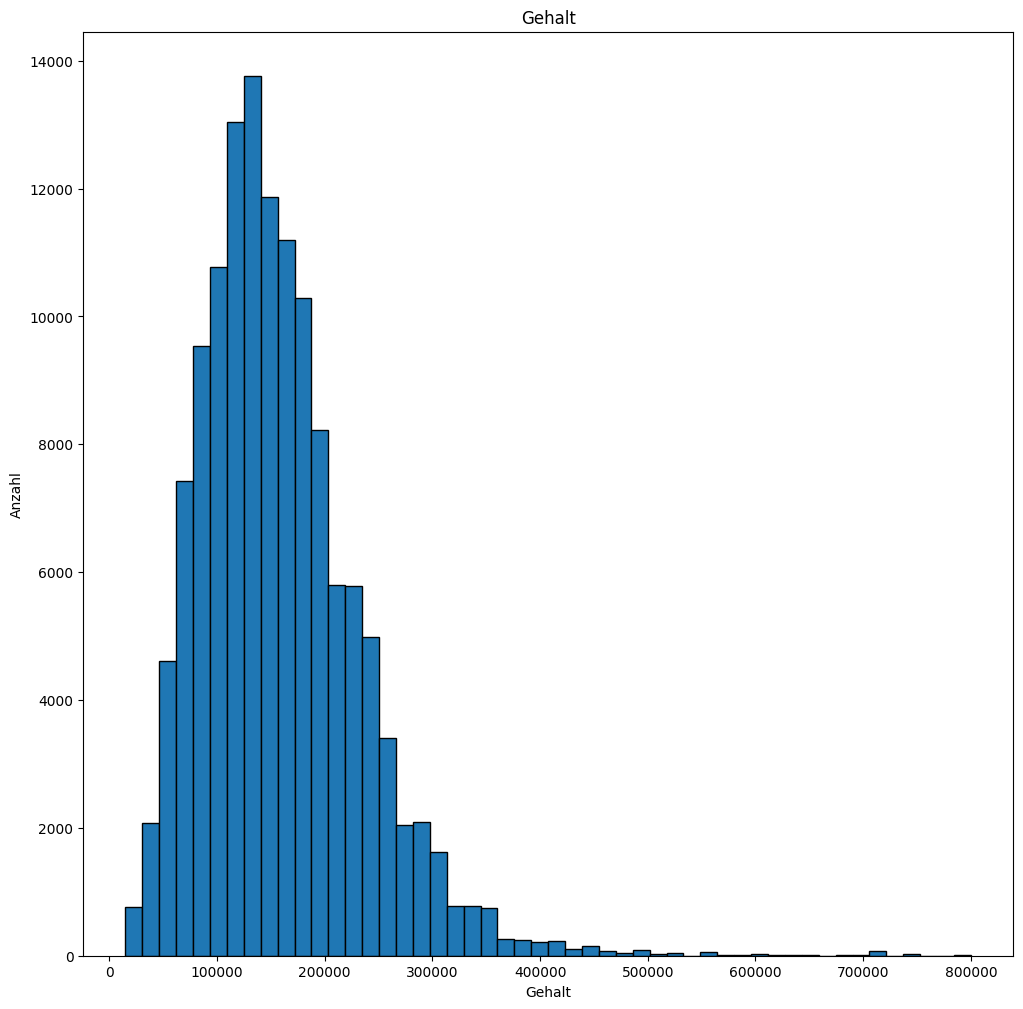

In [16]:
plt.figure(figsize=(12, 12))
plt.hist(df['Gehalt_in_USD'],bins = 50, edgecolor="black")
plt.title("Gehalt")
plt.xlabel("Gehalt")
plt.ylabel("Anzahl")
plt.show()

# AULA 2


In [17]:
df.isnull()

,Arbeitsjahr,Erfahrungsstufe,Anstellungsart,Berufsbezeichnung,Gehalt,Gehaltswährung,Gehalt_in_USD,Wohnsitz_des_Mitarbeiters,Remote_Anteil,Unternehmensstandort,Unternehmensgröße
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum() # get how many nulls  info we get in each column

,0
Arbeitsjahr,10
Erfahrungsstufe,0
Anstellungsart,0
Berufsbezeichnung,0
Gehalt,0
Gehaltswährung,0
Gehalt_in_USD,0
Wohnsitz_des_Mitarbeiters,0
Remote_Anteil,0
Unternehmensstandort,0


In [19]:
df['Arbeitsjahr'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [20]:
df[df.isnull().any(axis = 1)] # getting all the nan lines
# the any Return True if bool(x) is True for any x in the iterable. If the iterable is empty, return False.

,Arbeitsjahr,Erfahrungsstufe,Anstellungsart,Berufsbezeichnung,Gehalt,Gehaltswährung,Gehalt_in_USD,Wohnsitz_des_Mitarbeiters,Remote_Anteil,Unternehmensstandort,Unternehmensgröße
5588,NaN,Senior,Vollzeit,Product Manager,184500,USD,184500,US,keine,US,M
59692,NaN,Mid,Vollzeit,Engineer,110000,USD,110000,DE,keine,DE,M
59710,NaN,Junior,Vollzeit,Data Scientist,208800,USD,208800,US,keine,US,M
59759,NaN,Senior,Vollzeit,Software Engineer,135000,USD,135000,US,keine,US,M
59789,NaN,Senior,Vollzeit,Engineer,112000,USD,112000,US,keine,US,M
131000,NaN,Senior,Vollzeit,Machine Learning Engineer,163800,USD,163800,US,keine,US,M
131006,NaN,Senior,Vollzeit,Data Analytics Manager,204500,USD,204500,US,keine,US,M
133054,NaN,Junior,Vollzeit,Data Scientist,40000,USD,40000,JP,vollzeit,MY,L
133281,NaN,Mid,Vollzeit,Machine Learning Engineer,180000,PLN,46597,PL,vollzeit,PL,L
133317,NaN,Mid,Vollzeit,Data Scientist,130000,USD,130000,US,teilzeit,US,L


In [21]:
df_salarios = pd.DataFrame(
    {
     "nome": ["Ana","Bruno","Carlos","Mana","Val"],
     "salario":[123123.34,231.1324,np.nan,np.nan,12001202101.3134234],
    }
)
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
display(df_salarios)


,nome,salario,salario_media,salario_mediana
0,Ana,1.231233e+05,1.231233e+05,1.231233e+05
1,Bruno,2.311324e+02,2.311324e+02,2.311324e+02
2,Carlos,NaN,4.000442e+09,1.231233e+05
3,Mana,NaN,4.000442e+09,1.231233e+05
4,Val,1.200120e+10,1.200120e+10,1.200120e+10


In [22]:
df_temperaturas = pd.DataFrame(
    {
     "Dia": ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"],
     "Temperatura": [30.5, np.nan, 28.0, 29.1, 31.5, 30.0, np.nan, 29.5, 30.2, 31.0, np.nan, 29.8, 30.1, 30.5, 31.2, 30.9, np.nan]
    })

df_temperaturas['preenchido_fill'] = df_temperaturas['Temperatura'].ffill() # Forward fill -> it takes the next value from the next line and put in the Nan value from the current line

display(df_temperaturas)

,Dia,Temperatura,preenchido_fill
0,1,30.5,30.5
1,2,NaN,30.5
2,3,28.0,28.0
3,4,29.1,29.1
4,5,31.5,31.5
5,6,30.0,30.0
6,7,NaN,30.0
7,8,29.5,29.5
8,9,30.2,30.2
9,10,31.0,31.0


In [23]:
df_temperaturas = pd.DataFrame(
    {
     "Dia": ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"],
     "Temperatura": [30.5, np.nan, 28.0, 29.1, 31.5, 30.0, np.nan, 29.5, 30.2, 31.0, np.nan, 29.8, 30.1, 30.5, 31.2, 30.9, np.nan]
    })

df_temperaturas['preenchido_bfill'] = df_temperaturas['Temperatura'].bfill() # backward fill -> it takes the last value from the last line and put in the Nan value from the current line

display(df_temperaturas)

,Dia,Temperatura,preenchido_bfill
0,1,30.5,30.5
1,2,NaN,28.0
2,3,28.0,28.0
3,4,29.1,29.1
4,5,31.5,31.5
5,6,30.0,30.0
6,7,NaN,29.5
7,8,29.5,29.5
8,9,30.2,30.2
9,10,31.0,31.0


In [24]:
df_cidades = pd.DataFrame({
    "nome": ["Ana", "Bruno", "Carlos", "Diana", "Eduardo"],
    "cidade": ["São Paulo", np.nan, np.nan, "São Paulo", "Curitiba"]
})

df_cidades['cidades_preenchidas'] = df_cidades['cidade'].fillna("Não informado")
display(df_cidades)

,nome,cidade,cidades_preenchidas
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,NaN,Não informado
3,Diana,São Paulo,São Paulo
4,Eduardo,Curitiba,Curitiba


In [25]:
df_limpo = df.copy()
df_limpo = df_limpo.dropna()
display(df_limpo.isnull().sum())

,0
Arbeitsjahr,0
Erfahrungsstufe,0
Anstellungsart,0
Berufsbezeichnung,0
Gehalt,0
Gehaltswährung,0
Gehalt_in_USD,0
Wohnsitz_des_Mitarbeiters,0
Remote_Anteil,0
Unternehmensstandort,0


In [26]:
df_limpo.head()

,Arbeitsjahr,Erfahrungsstufe,Anstellungsart,Berufsbezeichnung,Gehalt,Gehaltswährung,Gehalt_in_USD,Wohnsitz_des_Mitarbeiters,Remote_Anteil,Unternehmensstandort,Unternehmensgröße
0,2025.0,Senior,Vollzeit,Solutions Engineer,214000,USD,214000,US,vollzeit,US,M
1,2025.0,Senior,Vollzeit,Solutions Engineer,136000,USD,136000,US,vollzeit,US,M
2,2025.0,Mid,Vollzeit,Data Engineer,158800,USD,158800,AU,keine,AU,M
3,2025.0,Mid,Vollzeit,Data Engineer,139200,USD,139200,AU,keine,AU,M
4,2025.0,Junior,Vollzeit,Data Engineer,90000,USD,90000,US,keine,US,M


In [27]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Arbeitsjahr                133339 non-null  float64
 1   Erfahrungsstufe            133339 non-null  object 
 2   Anstellungsart             133339 non-null  object 
 3   Berufsbezeichnung          133339 non-null  object 
 4   Gehalt                     133339 non-null  int64  
 5   Gehaltswährung             133339 non-null  object 
 6   Gehalt_in_USD              133339 non-null  int64  
 7   Wohnsitz_des_Mitarbeiters  133339 non-null  object 
 8   Remote_Anteil              133339 non-null  object 
 9   Unternehmensstandort       133339 non-null  object 
 10  Unternehmensgröße          133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [28]:
df_limpo = df_limpo.assign(Arbeitsjahr = df_limpo['Arbeitsjahr'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Arbeitsjahr                133339 non-null  int64 
 1   Erfahrungsstufe            133339 non-null  object
 2   Anstellungsart             133339 non-null  object
 3   Berufsbezeichnung          133339 non-null  object
 4   Gehalt                     133339 non-null  int64 
 5   Gehaltswährung             133339 non-null  object
 6   Gehalt_in_USD              133339 non-null  int64 
 7   Wohnsitz_des_Mitarbeiters  133339 non-null  object
 8   Remote_Anteil              133339 non-null  object
 9   Unternehmensstandort       133339 non-null  object
 10  Unternehmensgröße          133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Aula 3

<Axes: title={'center': 'Quantidade de Experiencias'}, xlabel='Erfahrungsstufe'>

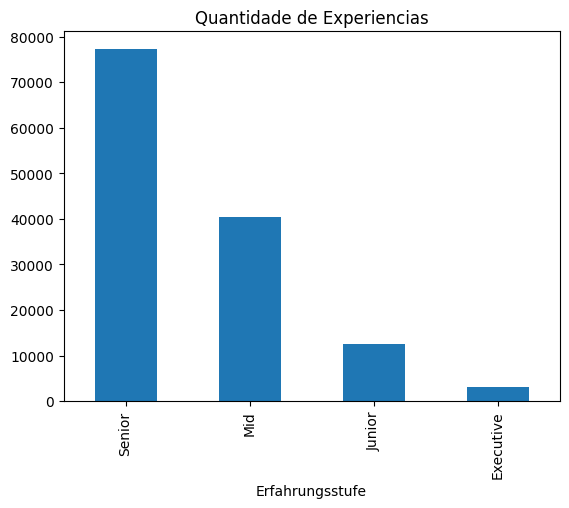

In [29]:
df_limpo['Erfahrungsstufe'].value_counts().plot(kind = 'bar',title = 'Quantidade de Experiencias')

<Axes: xlabel='Erfahrungsstufe', ylabel='Gehalt_in_USD'>

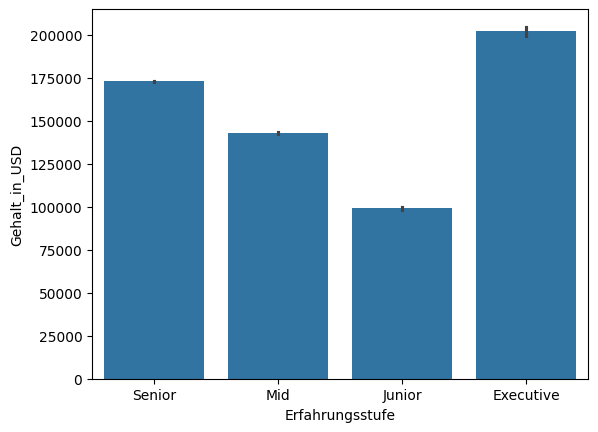

In [30]:
sns.barplot(data = df_limpo, x = 'Erfahrungsstufe', y = 'Gehalt_in_USD')


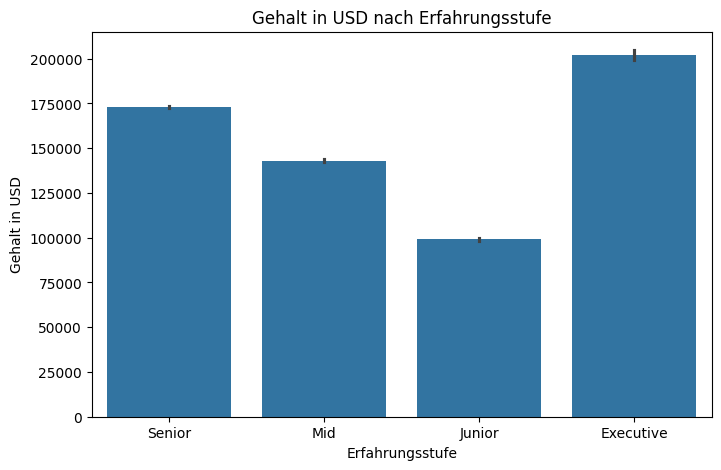

In [31]:
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'Erfahrungsstufe', y = 'Gehalt_in_USD')
plt.title('Gehalt in USD nach Erfahrungsstufe')
plt.xlabel('Erfahrungsstufe')
plt.ylabel('Gehalt in USD')
plt.show()

In [32]:
df_limpo.groupby('Erfahrungsstufe')['Gehalt_in_USD'].mean().sort_values(ascending = False)

,Gehalt_in_USD
Erfahrungsstufe,
Executive,202027.667813
Senior,172850.838301
Mid,143044.845979
Junior,99034.963267


In cell I1qswB-6FnoB, the code df_limpo.groupby('Erfahrungsstufe')['Gehalt_in_USD'].mean() does the following:

df_limpo.groupby('Erfahrungsstufe'): This groups the DataFrame df_limpo by the unique values in the 'Erfahrungsstufe' column. This creates separate groups for each experience level (Senior, Mid, Junior, Executive).
['Gehalt_in_USD']: After grouping, this selects the 'Gehalt_in_USD' column for each group.
.mean(): This calculates the mean (average) of the 'Gehalt_in_USD' for each of the groups created in step 1.
.sort_values(ascending = False): Finally, this sorts the resulting average salaries in descending order, so you can see the experience level with the highest average salary first.

In [33]:
ordem = df_limpo.groupby('Erfahrungsstufe')['Gehalt_in_USD'].mean().sort_values(ascending = True).index
ordem

Index(['Junior', 'Mid', 'Senior', 'Executive'], dtype='object', name='Erfahrungsstufe')

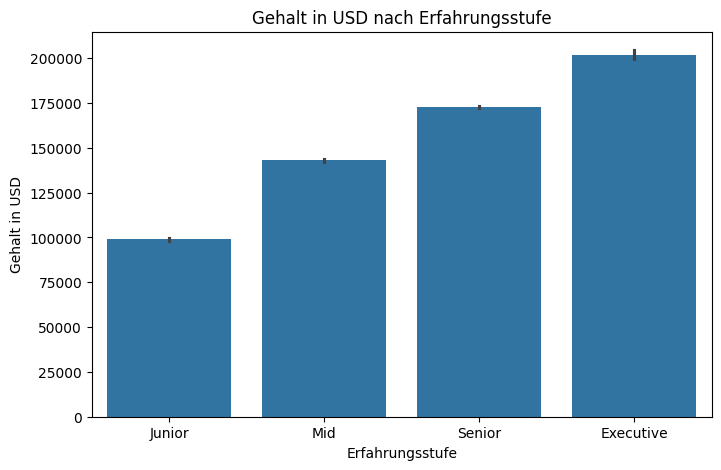

In [34]:
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'Erfahrungsstufe', y = 'Gehalt_in_USD', order = ordem)
plt.title('Gehalt in USD nach Erfahrungsstufe')
plt.xlabel('Erfahrungsstufe')
plt.ylabel('Gehalt in USD')
plt.show()

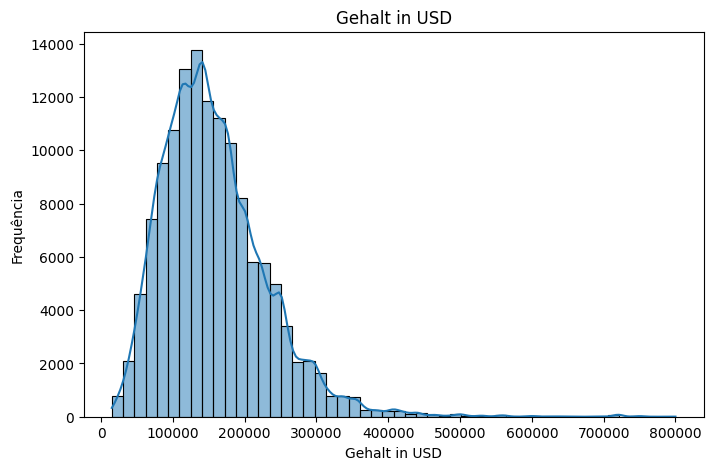

In [35]:
plt.figure(figsize = (8,5))
sns.histplot(df_limpo['Gehalt_in_USD'],bins = 50,kde = True)
plt.title('Gehalt in USD')
plt.xlabel('Gehalt in USD')
plt.ylabel('Frequência')
plt.show()

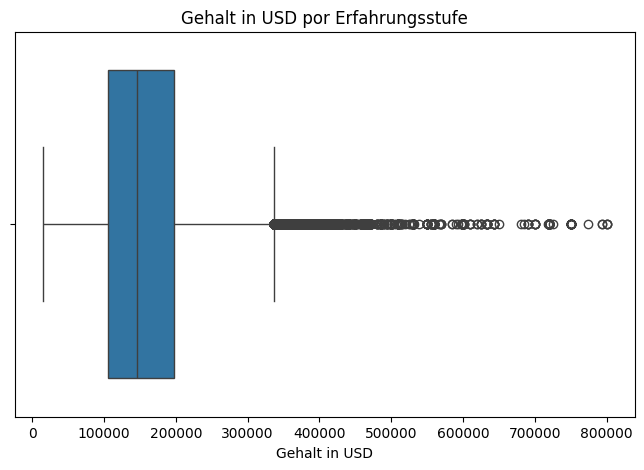

In [36]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df_limpo['Gehalt_in_USD'])
plt.title('Gehalt in USD por Erfahrungsstufe')
plt.xlabel('Gehalt in USD')
plt.show()

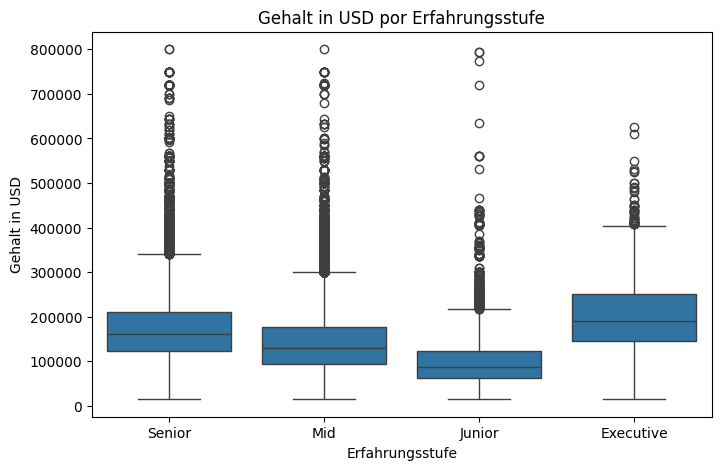

In [37]:
ordem_senioridade = ["Senior", "Mid", "Junior", "Executive"]
plt.figure(figsize = (8,5))
sns.boxplot(x = "Erfahrungsstufe", y = "Gehalt_in_USD", data = df_limpo, order = ordem_senioridade)
plt.title('Gehalt in USD por Erfahrungsstufe')
plt.xlabel('Erfahrungsstufe')
plt.ylabel('Gehalt in USD')
plt.show()

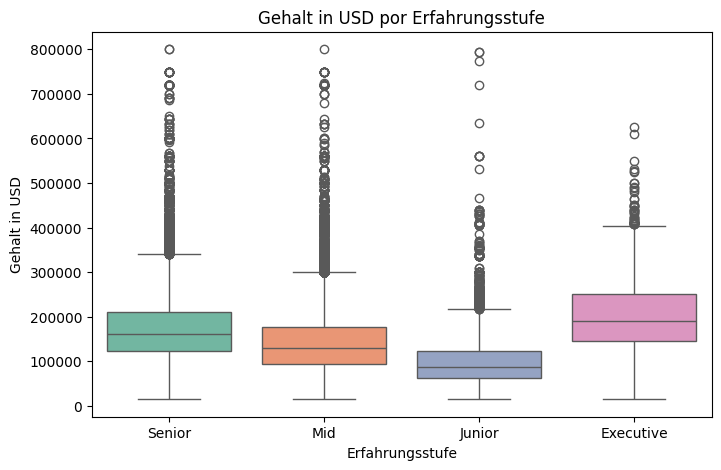

In [38]:
ordem_senioridade = ["Senior", "Mid", "Junior", "Executive"]
plt.figure(figsize = (8,5))
sns.boxplot(x = "Erfahrungsstufe", y = "Gehalt_in_USD", data = df_limpo, order = ordem_senioridade, palette = 'Set2', hue = "Erfahrungsstufe")
#Set2 is a categorical value colors
# hue is the color related to the categorical info
plt.title('Gehalt in USD por Erfahrungsstufe')
plt.xlabel('Erfahrungsstufe')
plt.ylabel('Gehalt in USD')
plt.show()

In [39]:
#Take the names
senioridade_media = df_limpo.groupby('Erfahrungsstufe')['Gehalt_in_USD'].mean().sort_values(ascending = False).reset_index()
fig = px.bar(
    senioridade_media,
    x = 'Erfahrungsstufe',
    y = 'Gehalt_in_USD',
    title = 'Gehalt in USD por Erfahrungsstufe',
    labels = ({'Gehalt_in_USD': 'Gehalt in USD', 'Erfahrungsstufe': 'Erfahrungsstufe'})
)
fig.show()

In [40]:
remoto_contagem = df_limpo['Anstellungsart'].value_counts().reset_index()
remoto_contagem.columns = ["Trabalho","Quantidade"]
fig = px.pie(remoto_contagem, values='Quantidade', names='Trabalho', title='Trabalho por quantidade')
fig.show()

In [41]:
remoto_contagem = df_limpo['Anstellungsart'].value_counts().reset_index()
remoto_contagem.columns = ["Trabalho","Quantidade"]
fig = px.pie(remoto_contagem, values='Quantidade', names='Trabalho',hole = 0.4, title='Trabalho por quantidade')
fig.show()

In [42]:
remoto_contagem = df_limpo['Anstellungsart'].value_counts().reset_index()
remoto_contagem.columns = ["Trabalho","Quantidade"]
fig = px.pie(remoto_contagem, values='Quantidade', names='Trabalho',hole = 0.4, title='Trabalho por quantidade')
# fig update basically give us the percentage label
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [43]:
# Let´s take salary x country
# Let´s take salary x country related to data science
# PASSWORD : MATPLOTLIB

In [45]:
df.columns #employee_residence

Index(['Arbeitsjahr', 'Erfahrungsstufe', 'Anstellungsart', 'Berufsbezeichnung',
       'Gehalt', 'Gehaltswährung', 'Gehalt_in_USD',
       'Wohnsitz_des_Mitarbeiters', 'Remote_Anteil', 'Unternehmensstandort',
       'Unternehmensgröße'],
      dtype='object')

In [46]:
df['Unternehmensstandort'].value_counts()

,count
Unternehmensstandort,
US,119641
CA,5239
GB,3719
AU,522
NL,404
...,...
IR,1
BS,1
IQ,1


In [47]:
ordem_salary = df_limpo.groupby('Unternehmensstandort')['Gehalt_in_USD'].mean().sort_values(ascending = True).index
ordem_salary

Index(['DO', 'MD', 'TH', 'EC', 'SV', 'GH', 'HU', 'TW', 'PH', 'SK', 'AS', 'JM',
       'XK', 'RO', 'PK', 'CR', 'JO', 'BS', 'LV', 'OM', 'AM', 'CF', 'CY', 'EE',
       'AD', 'GR', 'IN', 'SI', 'PE', 'HN', 'NG', 'LT', 'PT', 'ZM', 'HR', 'AT',
       'DZ', 'CL', 'MK', 'KE', 'CO', 'VN', 'LU', 'ES', 'ZA', 'TR', 'BR', 'ID',
       'FI', 'MY', 'FR', 'BA', 'NO', 'LS', 'MT', 'PL', 'NL', 'RS', 'DK', 'RU',
       'GI', 'AR', 'IT', 'MX', 'AE', 'KR', 'PA', 'GB', 'JP', 'CN', 'IR', 'MU',
       'IQ', 'SE', 'DE', 'BE', 'UA', 'IE', 'CH', 'BG', 'NZ', 'EG', 'SG', 'LB',
       'AU', 'CA', 'PR', 'HK', 'SA', 'IL', 'CZ', 'US', 'VE', 'CD', 'QA'],
      dtype='object', name='Unternehmensstandort')

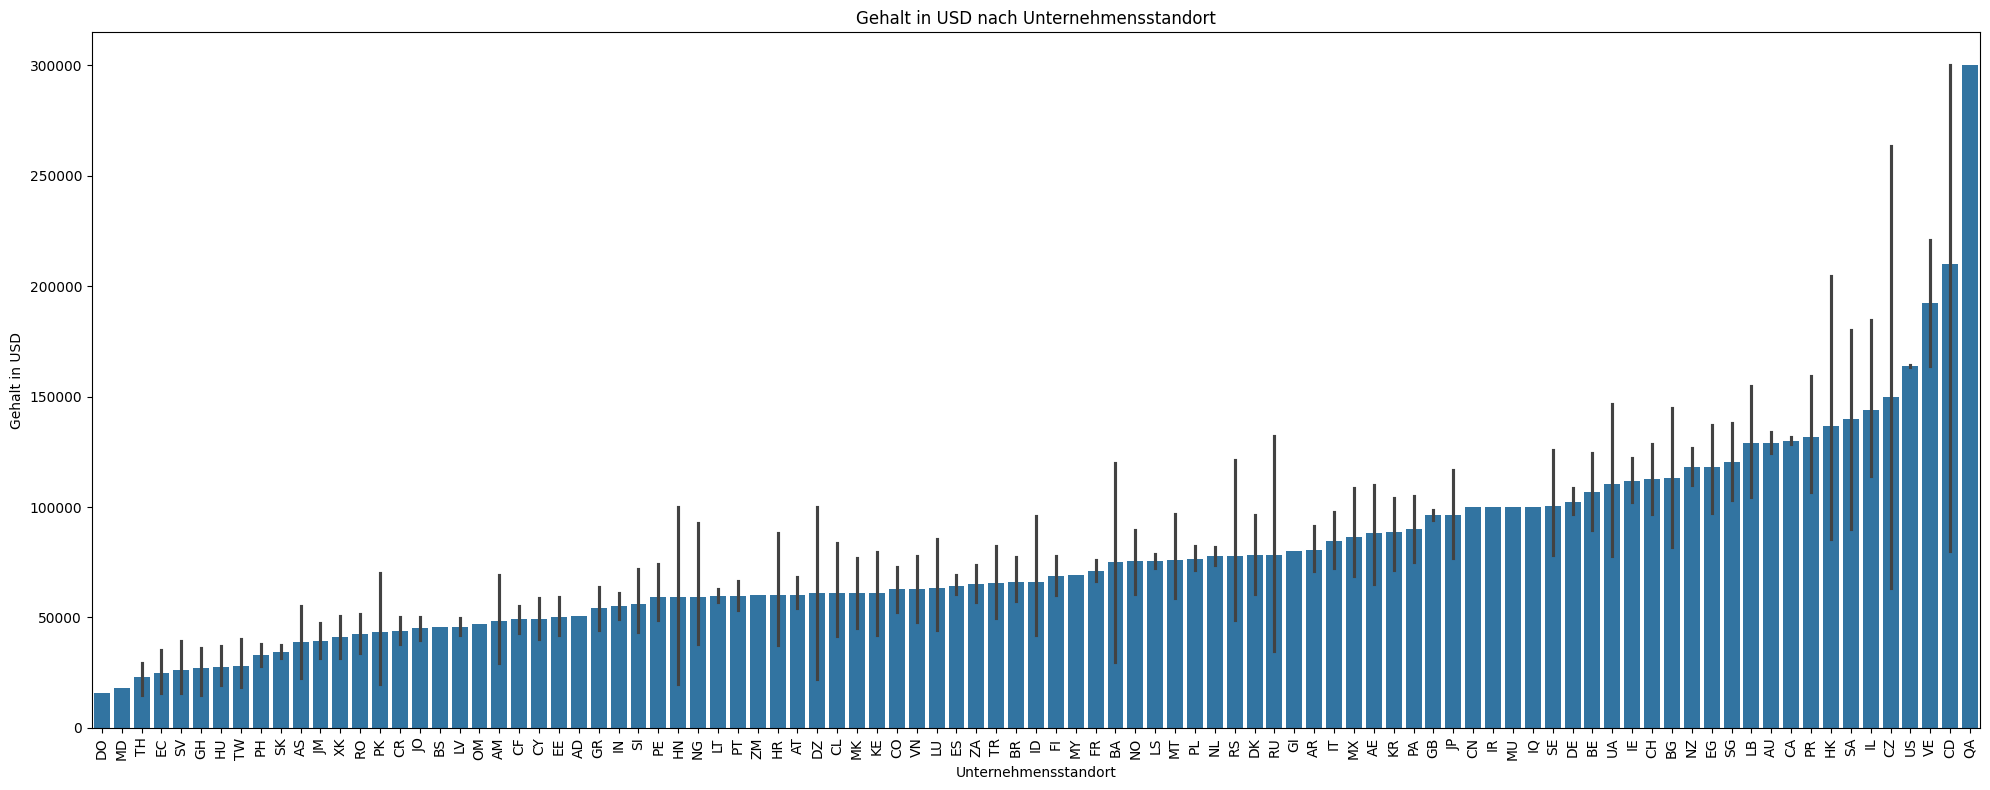

In [53]:
plt.figure(figsize = (20,8)) # Increased figure width to accommodate rotated labels
sns.barplot(data = df_limpo, x = 'Unternehmensstandort', y = 'Gehalt_in_USD', order = ordem_salary)
plt.title('Gehalt in USD nach Unternehmensstandort')
plt.xlabel('Unternehmensstandort')
plt.ylabel('Gehalt in USD')
plt.xticks(rotation=90) # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

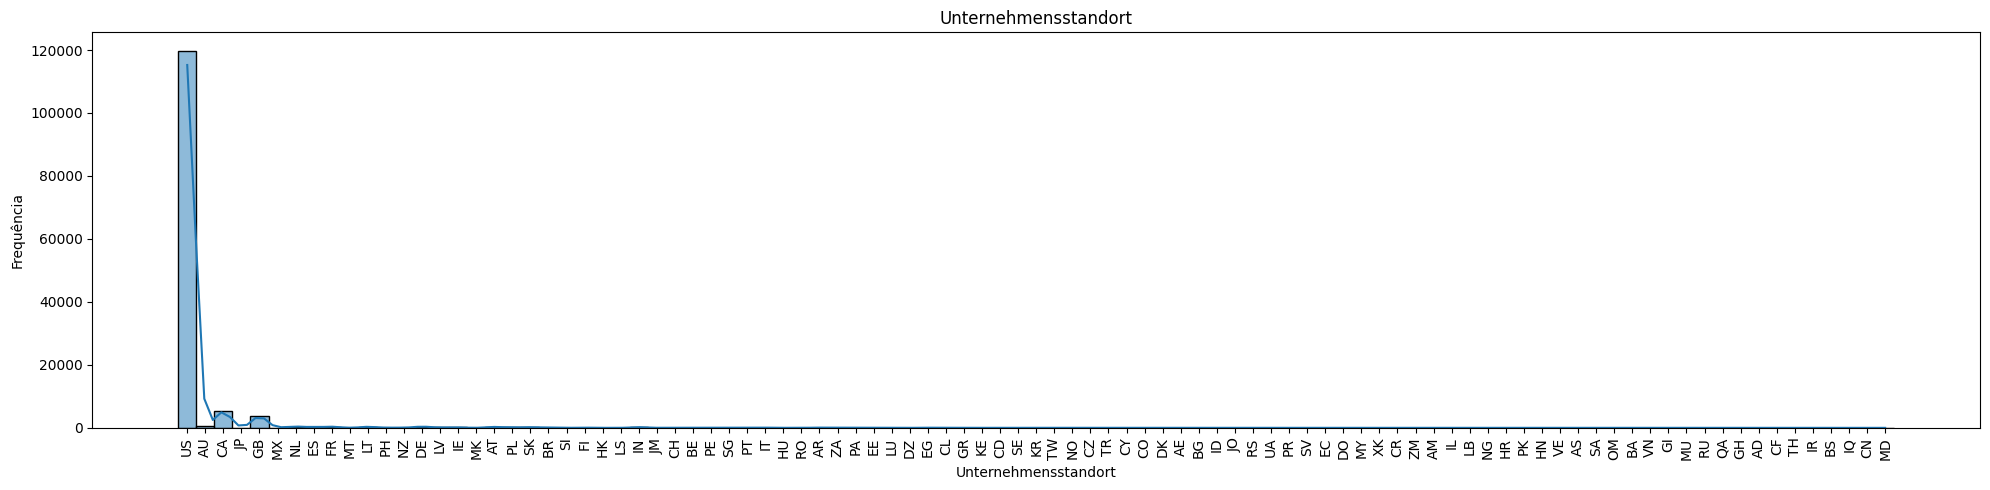

In [58]:
plt.figure(figsize = (20,5))
sns.histplot(df_limpo['Unternehmensstandort'],bins = 50,kde = True)
plt.title('Unternehmensstandort')
plt.xlabel('Unternehmensstandort')
plt.ylabel('Frequência')
plt.xticks(rotation=90) # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [60]:
df_limpo_DE = df_limpo[df_limpo['Berufsbezeichnung'] == 'Data Engineer']
display(df_limpo_DE)

,Arbeitsjahr,Erfahrungsstufe,Anstellungsart,Berufsbezeichnung,Gehalt,Gehaltswährung,Gehalt_in_USD,Wohnsitz_des_Mitarbeiters,Remote_Anteil,Unternehmensstandort,Unternehmensgröße
2,2025,Mid,Vollzeit,Data Engineer,158800,USD,158800,AU,keine,AU,M
3,2025,Mid,Vollzeit,Data Engineer,139200,USD,139200,AU,keine,AU,M
4,2025,Junior,Vollzeit,Data Engineer,90000,USD,90000,US,keine,US,M
5,2025,Junior,Vollzeit,Data Engineer,80000,USD,80000,US,keine,US,M
44,2025,Mid,Vollzeit,Data Engineer,54785,GBP,69348,GB,keine,GB,M
...,...,...,...,...,...,...,...,...,...,...,...
133307,2020,Mid,Vollzeit,Data Engineer,110000,USD,110000,US,vollzeit,US,L
133312,2021,Senior,Vollzeit,Data Engineer,65000,EUR,76833,RO,teilzeit,GB,S
133333,2021,Mid,Vollzeit,Data Engineer,38400,EUR,45391,NL,vollzeit,NL,L
133337,2020,Mid,Vollzeit,Data Engineer,130800,USD,130800,ES,vollzeit,US,M


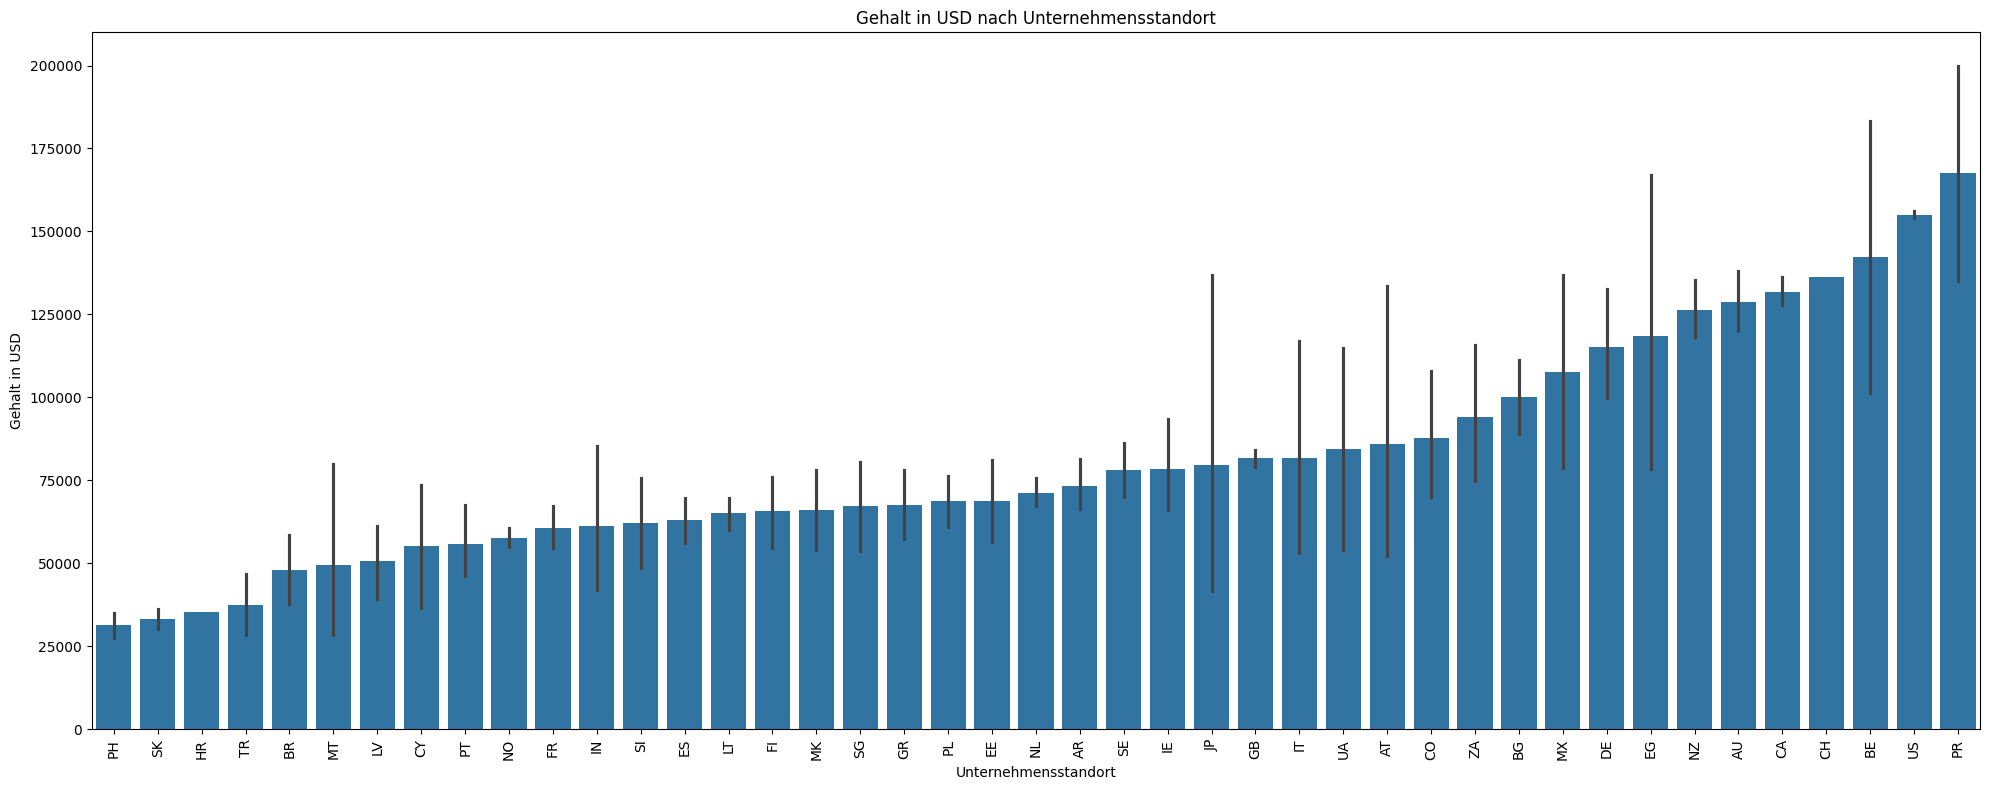

In [61]:
ordem_salary = df_limpo_DE.groupby('Unternehmensstandort')['Gehalt_in_USD'].mean().sort_values(ascending = True).index
plt.figure(figsize = (20,8)) # Increased figure width to accommodate rotated labels
sns.barplot(data = df_limpo_DE, x = 'Unternehmensstandort', y = 'Gehalt_in_USD', order = ordem_salary)
plt.title('Gehalt in USD nach Unternehmensstandort')
plt.xlabel('Unternehmensstandort')
plt.ylabel('Gehalt in USD')
plt.xticks(rotation=90) # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# AULA 4:

In [ ]:
import pycountry
#Iso2_to_iso3 changes the BR to Brazil, for example
def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except:
    return None

df_limpo['Unternehmensstandort_iso'] = df_limpo['Unternehmensstandort'].apply(iso2_to_iso3)

df_ds = df_limpo[df_limpo['Berufsbezeichnung'] == "Data Engineer"]
media_ds_pais  = df_ds.groupby('Unternehmensstandort_iso')['Gehalt_in_USD'].mean().reset_index()


fig = px.choropleth(
    media_ds_pais,
    locations = 'Unternehmensstandort_iso',
    color = 'Gehalt_in_USD',
    color_continuous_scale = 'rdylgn',
    #hover_name = ['Unternehmensstandort_iso', 'Gehalt_in_USD'],
    title = 'Gehalt in USD por País',
    labels = {'Gehalt_in_USD': 'Salario Medio', 'Unternehmensstandort': 'País'}
)
fig.show()